In [1]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
y=pd.read_csv('y.csv')
y

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles
...,...,...,...
3805,3805,55,tiled
3806,3806,67,wood
3807,3807,48,fine_concrete
3808,3808,54,tiled


In [3]:
train.series_id.nunique()
test.series_id.nunique()

3816

In [4]:
train.groupby('series_id')['measurement_number'].count()
test.groupby('series_id')['measurement_number'].count()

series_id
0       128
1       128
2       128
3       128
4       128
       ... 
3811    128
3812    128
3813    128
3814    128
3815    128
Name: measurement_number, Length: 3816, dtype: int64

In [5]:
y.head()

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles


In [6]:
test.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.025773,-0.98864,-0.14801,0.003350,-0.006524,-0.001071,-0.027390,0.10043,4.2061,-5.5439
1,0_1,0,1,-0.025683,-0.98862,-0.14816,0.003439,-0.113960,0.083987,-0.060590,-0.70889,3.9905,-8.0273
2,0_2,0,2,-0.025617,-0.98861,-0.14826,0.003571,-0.080518,0.114860,-0.037177,1.45710,2.2828,-11.2990
3,0_3,0,3,-0.025566,-0.98862,-0.14817,0.003609,0.070067,0.033820,-0.035904,0.71096,1.8582,-12.2270
4,0_4,0,4,-0.025548,-0.98866,-0.14792,0.003477,0.152050,-0.029016,-0.015314,3.39960,2.7881,-10.4100


In [7]:
print(len(y));print(y.surface.unique());y.surface.nunique()

3810
['fine_concrete' 'concrete' 'soft_tiles' 'tiled' 'soft_pvc'
 'hard_tiles_large_space' 'carpet' 'hard_tiles' 'wood']


9

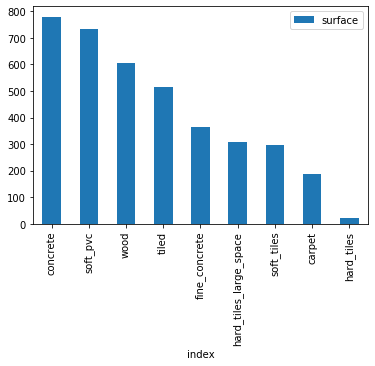

In [8]:
y['surface'].value_counts().reset_index().plot(x='index',y='surface',kind='bar')

In [9]:
train.isnull().sum()

row_id                   0
series_id                0
measurement_number       0
orientation_X            0
orientation_Y            0
orientation_Z            0
orientation_W            0
angular_velocity_X       0
angular_velocity_Y       0
angular_velocity_Z       0
linear_acceleration_X    0
linear_acceleration_Y    0
linear_acceleration_Z    0
dtype: int64

In [10]:
def plot_series_distribution(series):
    df_train=train[train['series_id']==series]
    df_test=test[test['series_id']==series]
    plt.figure(figsize=(30,15))
    for i, col in enumerate(df_train.columns[3:]):
        plt.subplot(3,4,i+1)
        df_train[col].hist(bins=100,color='blue')
        df_test[col].hist(bins=100,color='red')
        plt.title(col)

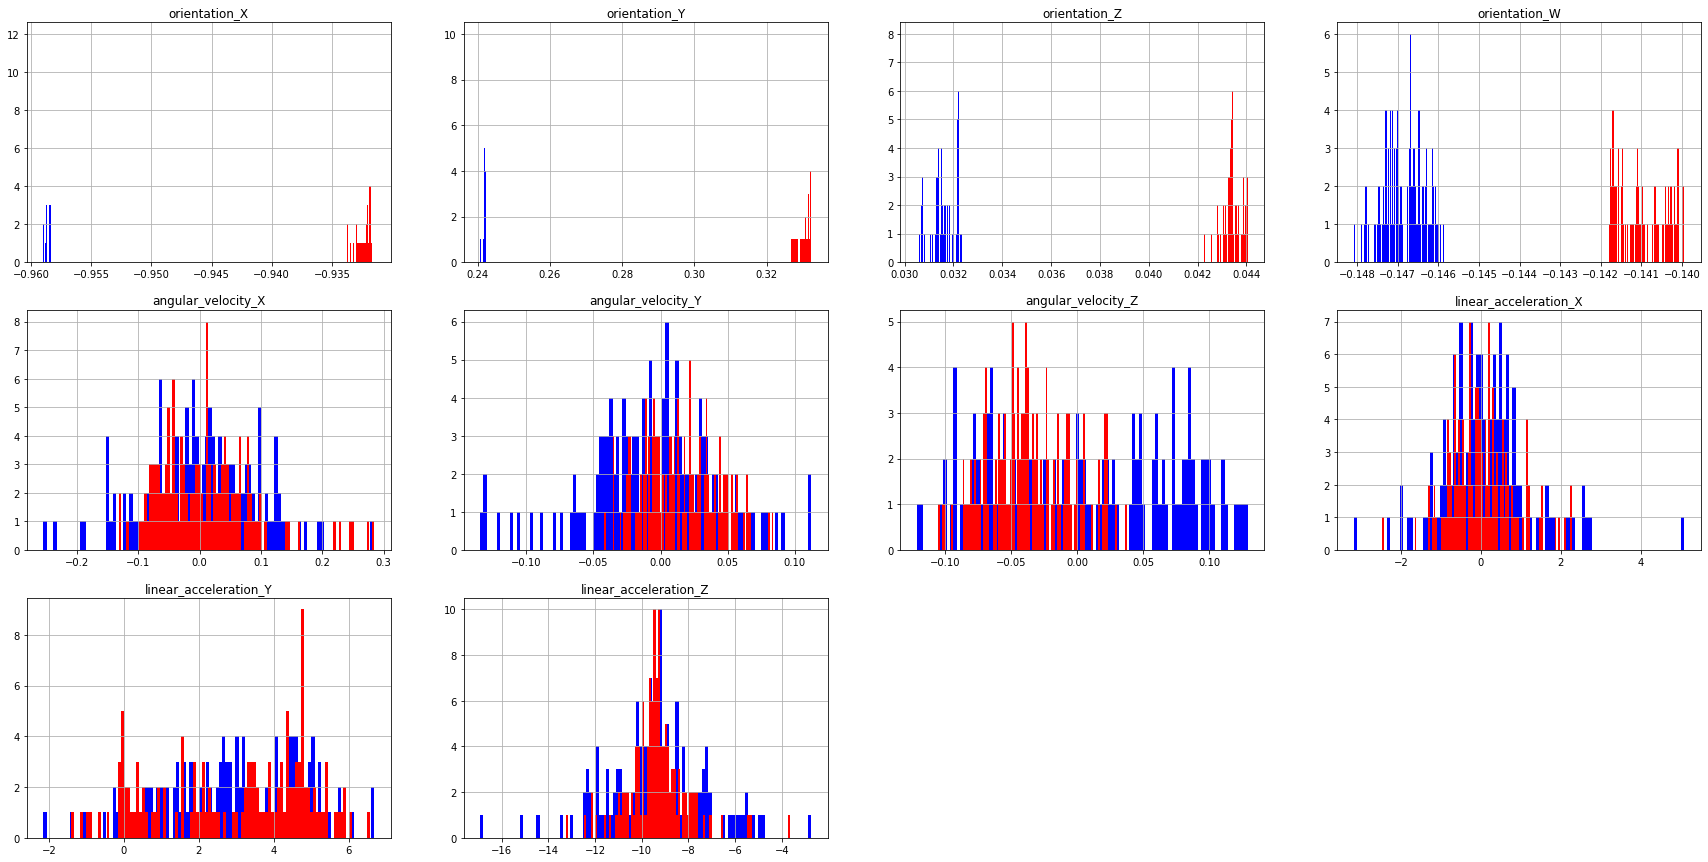

In [11]:
plot_series_distribution(1)

In [12]:
train_df=train[['series_id']].drop_duplicates().reset_index(drop=True)



In [13]:
test_df=test[['series_id']].drop_duplicates().reset_index(drop=True)


In [14]:
import numpy as np
def new_features(df,tf):
    for i,col in enumerate(df.columns[3:]):
        tf[col+'_mean']=df.groupby('series_id')[col].mean()
        tf[col+'_std']=df.groupby('series_id')[col].std()
        tf[col+'_max']=df.groupby('series_id')[col].max()
        tf[col+'_min']=df.groupby('series_id')[col].min()
        tf[col + '_max_to_min'] = tf[col + '_max'] / tf[col + '_min']
        tf[col+'_abs_max']=df.groupby('series_id')[col].apply(lambda x: np.max(np.abs(x)))
        tf[col+'_abs_min']=df.groupby('series_id')[col].apply(lambda x: np.min(np.abs(x)))
        tf[col+'_mad']=df.groupby('series_id')[col].mad()
        tf[col+'_kurtosis']=df.groupby('series_id')[col].apply(lambda x: x.kurtosis())
        tf[col+'_skew']=df.groupby('series_id')[col].skew()
        tf[col+'_median']=df.groupby('series_id')[col].median()
        tf[col+'_rolling_avg_10']=df.groupby('series_id')[col].rolling(10).mean().mean(skipna=True)
        tf[col+'_rolling_avg_10']=df.groupby('series_id')[col].rolling(10).std().mean(skipna=True)
    return tf

In [15]:
train_df=new_features(train,train_df)
test_df=new_features(test,test_df)

In [16]:
new_train=train_df.copy()
new_test=test_df.copy()
y_new=y['surface']
y_new.head()

0    fine_concrete
1         concrete
2         concrete
3         concrete
4       soft_tiles
Name: surface, dtype: object

In [34]:
new_train

,series_id,orientation_X_mean,orientation_X_std,orientation_X_max,orientation_X_min,orientation_X_max_to_min,orientation_X_abs_max,orientation_X_abs_min,orientation_X_mad,orientation_X_kurtosis,...,linear_acceleration_Z_min,linear_acceleration_Z_max_to_min,linear_acceleration_Z_abs_max,linear_acceleration_Z_abs_min,linear_acceleration_Z_mad,linear_acceleration_Z_kurtosis,linear_acceleration_Z_skew,linear_acceleration_Z_median,linear_acceleration_Z_rolling_avg_10,surface
0,0,-0.758666,0.000363,-0.75822,-0.75953,0.998275,0.75953,0.75822,0.000311,-0.646196,...,-12.5120,0.500967,12.5120,6.268100,0.839636,0.532135,0.067391,-9.42995,1.951229,2
1,1,-0.958606,0.000151,-0.95837,-0.95896,0.999385,0.95896,0.95837,0.000126,-0.642996,...,-16.9280,0.162151,16.9280,2.744900,1.562716,1.356800,-0.126848,-9.41380,1.951229,1
2,2,-0.512057,0.001377,-0.50944,-0.51434,0.990473,0.51434,0.50944,0.001144,-1.052580,...,-12.4990,0.459573,12.4990,5.744200,0.889865,0.446304,0.085877,-9.37440,1.951229,1
3,3,-0.939169,0.000227,-0.93884,-0.93968,0.999106,0.93968,0.93884,0.000197,-1.078090,...,-19.8450,0.028173,19.8450,0.559100,2.601023,0.670500,-0.210103,-9.16170,1.951229,1
4,4,-0.891301,0.002955,-0.88673,-0.89689,0.988672,0.89689,0.88673,0.002562,-1.165941,...,-10.9750,0.678724,10.9750,7.449000,0.654576,-0.486618,0.106132,-9.33280,1.951229,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3805,3805,-0.228787,0.001069,-0.22638,-0.23001,0.984218,0.23001,0.22638,0.000912,-0.642474,...,-22.2530,-0.222752,22.2530,0.005054,3.412695,0.921595,0.205344,-9.65750,1.951229,7
3806,3806,0.542262,0.001188,0.54436,0.54028,1.007552,0.54436,0.54028,0.001026,-1.219637,...,-9.4094,0.990339,9.4094,9.318500,0.015504,-0.511157,0.060870,-9.36740,1.951229,8
3807,3807,-0.416511,0.014830,-0.39188,-0.44250,0.885605,0.44250,0.39188,0.012814,-1.214983,...,-24.6860,-0.124913,24.6860,0.133240,4.363004,-0.024262,-0.044238,-9.53715,1.951229,2
3808,3808,-0.264584,0.004351,-0.25672,-0.27113,0.946852,0.27113,0.25672,0.003832,-1.233735,...,-17.3750,0.034757,17.3750,0.603910,2.486850,0.152798,0.108252,-9.40045,1.951229,7


In [17]:
new_train['surface']=y['surface']


In [18]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
lbl.fit(list(new_train['surface'].values))
new_train['surface'] = lbl.transform(list(new_train['surface'].values))



In [19]:
min_max=preprocessing.MinMaxScaler()
np_1=min_max.fit_transform(new_train)
np_2=min_max.fit_transform(new_test)
train_norm=pd.DataFrame(np_1,columns=new_train.columns)
test_norm=pd.DataFrame(np_2,columns=new_test.columns)


0       fine_concrete
1            concrete
2            concrete
3            concrete
4          soft_tiles
            ...      
3805            tiled
3806             wood
3807    fine_concrete
3808            tiled
3809         soft_pvc
Name: surface, Length: 3810, dtype: object

In [20]:
train_norm['surface'].unique()

array([0.25 , 0.125, 0.75 , 0.875, 0.625, 0.5  , 0.   , 0.375, 1.   ])

In [21]:
del train_norm['surface']

In [51]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(n_estimators=1000, min_samples_leaf=5, max_features=0.5, n_jobs=-1, oob_score=True)
X_train, X_valid, y_train, y_valid = train_test_split(train_df, y_new, test_size = 0.2, random_state = 42)
rf.fit(X_train, y_train)

''''param_grid={'n_estimators':[200,500,10000],
            'max_features':['auto','sqrt','log2'],
            'max_depth':[4,5,6,7,8],
            'criterion':['gini','entropy']
}
cv_rf=GridSearchCV(estimator=clf,param_grid=param_grid,cv=5)
cv_rf.fit(X_train,y_train)
cv_rf.score(X_train,y_train)
cv_rf.best_params_
'''




"'param_grid={'n_estimators':[200,500,10000],\n            'max_features':['auto','sqrt','log2'],\n            'max_depth':[4,5,6,7,8],\n            'criterion':['gini','entropy']\n}\ncv_rf=GridSearchCV(estimator=clf,param_grid=param_grid,cv=5)\ncv_rf.fit(X_train,y_train)\ncv_rf.score(X_train,y_train)\ncv_rf.best_params_\n"

In [60]:
X_train.describe()

,series_id,orientation_X_mean,orientation_X_std,orientation_X_max,orientation_X_min,orientation_X_max_to_min,orientation_X_abs_max,orientation_X_abs_min,orientation_X_mad,orientation_X_kurtosis,...,linear_acceleration_Z_max,linear_acceleration_Z_min,linear_acceleration_Z_max_to_min,linear_acceleration_Z_abs_max,linear_acceleration_Z_abs_min,linear_acceleration_Z_mad,linear_acceleration_Z_kurtosis,linear_acceleration_Z_skew,linear_acceleration_Z_median,linear_acceleration_Z_rolling_avg_10
count,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3.048000e+03,3048.000000,3048.000000,...,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3.048000e+03
mean,1924.353675,-0.020085,0.004165,-0.012974,-0.027189,1.060179,0.628869,6.147604e-01,0.003589,-0.919026,...,-3.508005,-15.461424,0.352356,15.463918,4.646486,1.623608,0.509915,-0.040549,-9.354869,1.951229e+00
std,1097.663110,0.685110,0.006378,0.685504,0.684734,3.095242,0.285156,2.910434e-01,0.005507,0.825650,...,5.589626,5.819928,0.376922,5.837590,3.163314,1.383997,1.943006,0.338881,0.160136,4.441621e-16
min,1.000000,-0.988844,0.000012,-0.988590,-0.989100,-10.383904,0.002182,7.084100e-07,0.000011,-1.721015,...,-9.404700,-65.492000,-1.073698,9.369800,0.000190,0.007470,-1.189077,-7.389460,-10.111000,1.951229e+00
25%,971.750000,-0.706948,0.000672,-0.701372,-0.710263,0.986129,0.399377,3.854625e-01,0.000568,-1.207027,...,-7.620075,-18.185500,0.050031,11.148500,1.173300,0.550754,-0.294218,-0.174877,-9.435125,1.951229e+00
50%,1936.000000,-0.109708,0.001678,-0.095160,-0.130605,0.999131,0.683445,6.625350e-01,0.001439,-1.134004,...,-5.335250,-13.413500,0.396611,13.413500,5.335250,1.225715,0.077188,-0.012278,-9.358950,1.951229e+00
75%,2880.250000,0.649045,0.004509,0.657445,0.642707,1.008479,0.882240,8.754875e-01,0.003881,-0.856117,...,-0.898588,-11.148500,0.682458,18.185500,7.620075,2.367586,0.768163,0.120738,-9.284662,1.951229e+00
max,3809.000000,0.988643,0.042887,0.989100,0.988340,168.541728,0.989100,9.885900e-01,0.037026,28.244517,...,65.839000,-9.369800,0.995507,65.839000,9.404700,14.745362,62.989022,1.648874,-7.835400,1.951229e+00


In [52]:
rf.score(X_train,y_train)

0.9662073490813649

In [53]:
rf.score(X_valid,y_valid)

0.8727034120734908

In [61]:
pred=rf.predict(test_df)


In [62]:

submission1=pd.DataFrame({'series_id':test_df['series_id'],'surface':pred})
submission1.head
filename = 'sub_2.csv'

submission1.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: sub_2.csv


In [73]:
xgb=XGBClassifier(learning_rate = 0.1, n_estimators= 100, max_depth= 150, min_child_weight= 2)
xgb.fit(X_train,y_train)
xgb.score(X_train,y_train)

1.0

In [74]:
xgb.score(X_valid,y_valid)

0.9002624671916011

In [75]:
res=xgb.predict(test_df)

In [77]:
submission1=pd.DataFrame({'series_id':test_df['series_id'],'surface':res})
submission1.head
filename = 'sub_1.csv'

submission1.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: sub_1.csv


In [67]:
from sklearn.svm import SVC

sv=SVC()
sv.fit(X_train,y_train)
sv.score(X_train,y_train)

/home/srinivas/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8986220472440944

0.38320209973753283